In [1]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('my_data.csv')

In [3]:
data

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.69600,0.875000,0.1000,0.0373,128.276,257220,4,1
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.46300,0.056000,0.1030,0.3040,73.996,255030,4,1
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.77700,0.329000,0.0967,0.5290,99.622,228460,4,1
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.28900,0.714000,0.0961,0.9540,173.851,224107,4,1
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.85000,0.000353,0.1140,0.2340,86.909,255533,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,7szuecWAPwGoV1e5vGu8tl,In Your Eyes,The Weeknd,0.667,0.719,7,-5.371,0,0.00285,0.000081,0.0736,0.7170,100.021,237520,4,0
2492,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,0.598,0.427,7,-8.764,0,0.05460,0.000006,0.2100,0.0605,76.469,175721,4,0
2493,4Ty4XfOHdUFIXmVtBIFMIG,XPIDI,benji price,0.840,0.475,5,-6.665,0,0.64100,0.000000,0.0983,0.8820,77.006,172064,4,0
2494,1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),Jason Derulo,0.767,0.481,0,-8.520,0,0.23400,0.000000,0.2690,0.7610,150.076,171375,4,0


In [4]:
data =  data.dropna()

In [5]:
data['Like'].unique()

array([1, 0])

In [6]:
data.columns

Index(['id', 'title', 'main_artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Like'],
      dtype='object')

In [7]:
#Split the dataset 

X = data[['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]
y = data['Like']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

#### Logistic Regression

In [8]:
#logistic regression 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
lr_pred = lr_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))

Accuracy: 0.7636849132176236


#### Random Forest 

In [11]:
#Training the Algorithm

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8638184245660881


In [13]:
#Evaluating the Algorithm

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[357  40]
 [ 62 290]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       397
           1       0.88      0.82      0.85       352

    accuracy                           0.86       749
   macro avg       0.87      0.86      0.86       749
weighted avg       0.86      0.86      0.86       749

0.8638184245660881


In [14]:
predict_df = X_test
predict_df['prediction'] = y_pred
predict_df['Like'] = data['Like']
predict_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,prediction,Like
2376,0.772,0.841,5,-7.312,1,0.063100,0.000000,0.0550,0.688,121.641,216400,4,0,0
1604,0.680,0.766,11,-4.799,0,0.041100,0.000000,0.1160,0.280,160.095,180000,4,0,0
1069,0.590,0.549,7,-9.221,1,0.499000,0.002440,0.2120,0.706,95.355,266133,4,1,1
2161,0.497,0.896,6,-6.734,0,0.001200,0.000550,0.1030,0.560,96.878,258240,4,0,0
477,0.654,0.325,2,-11.925,1,0.740000,0.000021,0.1520,0.390,139.886,243238,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.742,0.759,10,-5.587,0,0.088200,0.000001,0.0907,0.686,92.037,226339,4,0,0
1087,0.592,0.576,5,-8.279,1,0.496000,0.107000,0.0869,0.276,110.045,198545,4,1,1
381,0.741,0.644,6,-10.794,1,0.227000,0.786000,0.1640,0.806,86.121,73592,4,1,1
2131,0.298,0.970,1,-6.866,1,0.000987,0.088400,0.3040,0.156,174.148,348682,4,0,0


In [15]:

predict_df = predict_df.merge(data[['title','main_artist']], left_index=True, right_index=True)


In [16]:
final_prediction = predict_df[['title','main_artist','Like','prediction']]
final_prediction['Check'] = np.where(final_prediction['prediction']==final_prediction['Like'], 'Correct', 'Wrong')
wrong_pred = final_prediction[final_prediction['Check'] == 'Wrong']

wrong_titles = list(wrong_pred['title'])
wrong_pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,main_artist,Like,prediction,Check
454,Versinho de número um,Mallu Magalhães,1,0,Wrong
2332,death bed (coffee for your head) (feat. beabad...,beabadoobee,0,1,Wrong
2296,Blind,Rooftime,0,1,Wrong
2396,Bem Bom,Doce,0,1,Wrong
1127,She,The Blaze,1,0,Wrong
...,...,...,...,...,...
512,LOVE. FEAT. ZACARI.,Zacari,1,0,Wrong
655,She Moves In Her Own Way,The Kooks,1,0,Wrong
1537,Nada,Dalex,0,1,Wrong
758,When I Paint My Masterpiece - Remastered 2000,The Band,1,0,Wrong


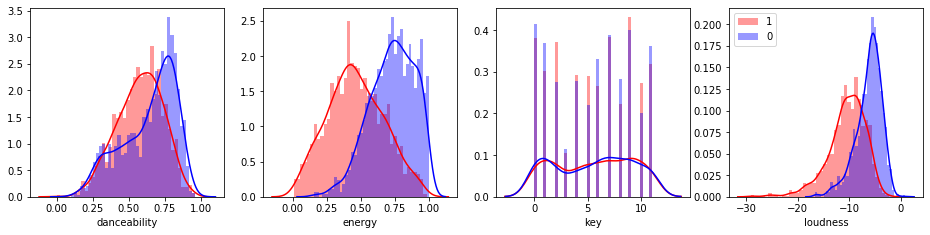

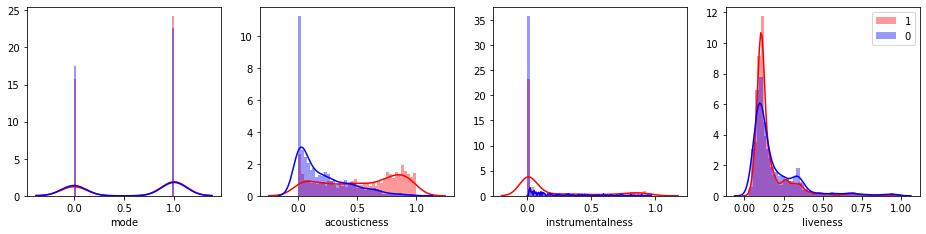

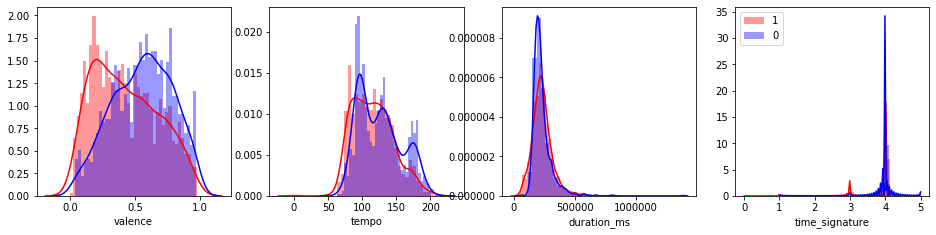

In [17]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['key'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['mode'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['time_signature'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

In [18]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
danceability,1.000000,0.049993,0.017720,0.278080,-0.121927,-0.063714,-0.140826,-0.086183,0.524456,-0.074034,-0.399311,0.157414,-0.177895
energy,0.049993,1.000000,0.007164,0.735860,-0.045817,-0.731234,-0.189612,0.178788,0.377971,0.201825,0.034622,0.167843,-0.586295
key,0.017720,0.007164,1.000000,-0.028822,-0.136256,-0.003427,0.017242,-0.010709,0.008287,-0.008551,-0.034275,-0.012487,0.004593
loudness,0.278080,0.735860,-0.028822,1.000000,-0.071247,-0.539780,-0.385929,0.083705,0.388303,0.140757,-0.100402,0.159202,-0.562671
mode,-0.121927,-0.045817,-0.136256,-0.071247,1.000000,0.055772,-0.009241,0.004764,-0.048690,0.005353,0.014200,-0.051953,0.043427
acousticness,-0.063714,-0.731234,-0.003427,-0.539780,0.055772,1.000000,0.161888,-0.106403,-0.243675,-0.176448,-0.093805,-0.128935,0.512668
instrumentalness,-0.140826,-0.189612,0.017242,-0.385929,-0.009241,0.161888,1.000000,-0.056551,-0.160171,-0.032619,0.036452,-0.049340,0.337054
liveness,-0.086183,0.178788,-0.010709,0.083705,0.004764,-0.106403,-0.056551,1.000000,0.040603,0.039203,0.004028,-0.033982,-0.074047
valence,0.524456,0.377971,0.008287,0.388303,-0.048690,-0.243675,-0.160171,0.040603,1.000000,0.114709,-0.297351,0.130681,-0.259217
tempo,-0.074034,0.201825,-0.008551,0.140757,0.005353,-0.176448,-0.032619,0.039203,0.114709,1.000000,0.037986,0.037713,-0.154059


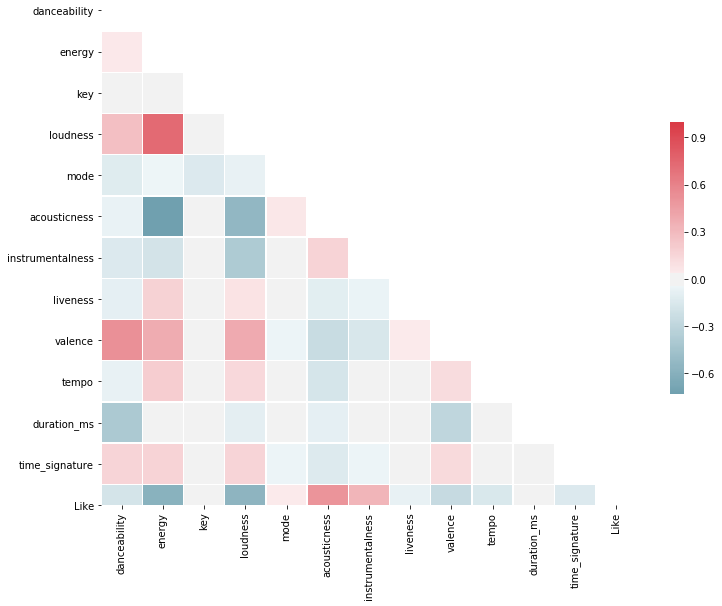

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

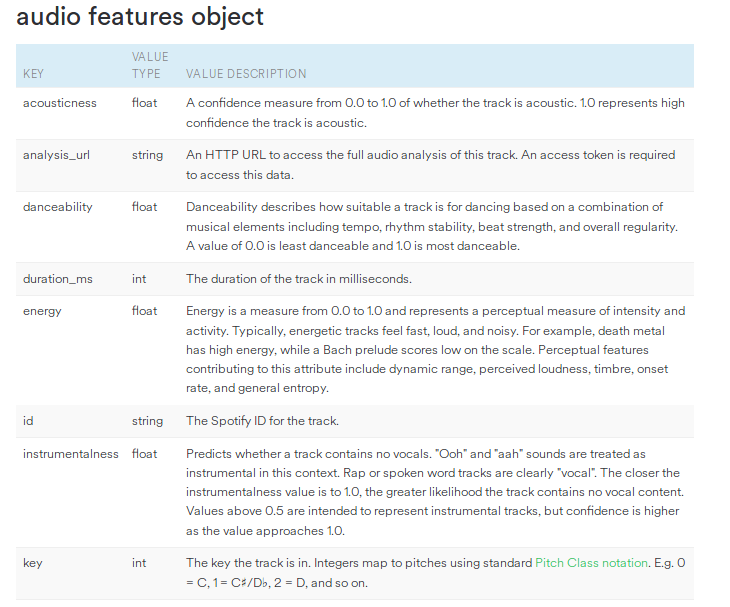

In [20]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='../images/features.png')

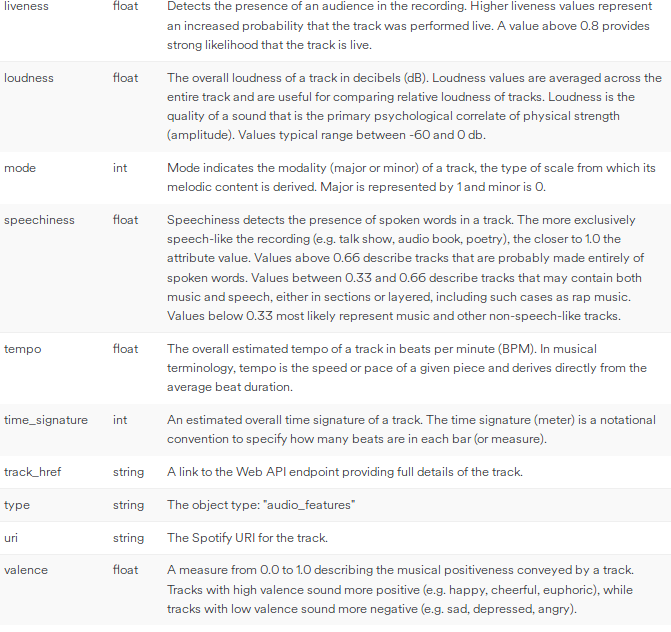

In [21]:
Image(filename='../images/features2.png')

### TEMPO. Simply put, how many beats per minute (BPM) does each song have?

Tempos are also related to different Genres

- Hip Hop	85–95 BPM
- Glitch Hop	105–115 BPM
- Techno	120–125 BPM
- House	& POP 115–130 BPM
- Electro	128 BPM
- Reggaeton >130 BPM
- Dubstep	140 BPM



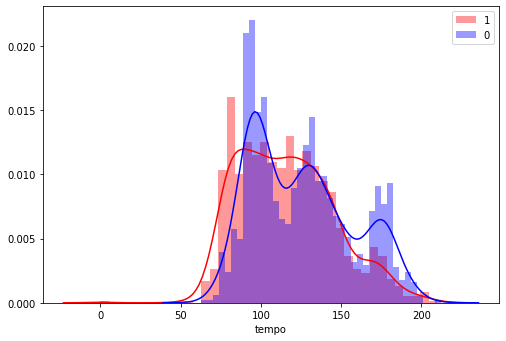

In [22]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.legend((1,0))

In [23]:
data[data['Like']==1]['tempo'].mean() #Thanks Frank Ocean!! 

115.93030218340628

In [24]:
data[data['Like']==0]['tempo'].mean()

125.4754019245002

### ENERGY. This is the first of Spotify’s more subjective metrics. 

###### According to the API documentation:
Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.


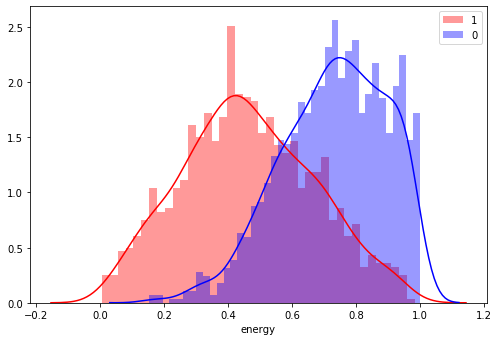

In [25]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.legend((1,0))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

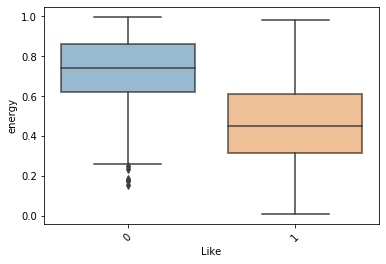

In [26]:
plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='Like', y='energy', data = data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [27]:
print(data[data['Like']==1]['energy'].mean()) 
print(data[data['Like']==0]['energy'].mean())

x = data[data['Like']==1]['energy']
y = data[data['Like']==0]['energy']

print(stats.ttest_ind(x,y)) #totally reject the H0 

#there are significant differences between the two groups on the ENERGY feature

0.46323046288209574
0.7310192450037021
Ttest_indResult(statistic=-36.143277469474214, pvalue=2.122127890770559e-230)


#### What artists are driving this ENERGY score on my liked songs?

In [28]:
lower_energy = data[data['Like']==1].sort_values("energy").head(30)
lower_energy

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
143,769vrJXv69vVKlZjX9XJ4W,Meet You In The Maze,James Blake,0.325,0.00722,10,-26.397,1,0.966,0.000010,0.1100,0.0650,107.448,295274,4,1
68,4QwzVlAJSkcLeCNQ6Ug30P,The touch of your lips,Chet Baker,0.478,0.00776,10,-24.986,1,0.983,0.780000,0.1050,0.2150,114.270,499533,4,1
568,2rewrH6juNsrGRtkMbNKAe,I work for the Universe,Nick Murphy,0.282,0.01030,2,-25.144,1,0.990,0.909000,0.1910,0.0999,115.202,583804,4,1
556,2TfNMJMvnILjmL8fSYlGAy,Blood And,Nick Murphy,0.273,0.01880,9,-28.400,1,0.989,0.963000,0.0944,0.0766,93.292,255135,4,1
565,0u0IIYFZXtmtKTJilgOI3Z,Tongue (Lift 4),Nick Murphy,0.154,0.02750,1,-18.428,1,0.988,0.000140,0.0939,0.0843,176.324,244603,5,1
557,2uEgyXzyJBr5Iuvqc83d4N,And You Don’t Even Know You Hurt Me,Nick Murphy,0.178,0.02900,5,-25.484,1,0.994,0.931000,0.1010,0.0711,71.676,808503,4,1
127,2ChIDG3Ae88OSrocGzjZzT,Lullaby For My Insomniac,James Blake,0.318,0.02970,10,-16.581,1,0.957,0.001170,0.0969,0.0624,129.706,223800,5,1
132,73Uc6U9BTEFoGP5ywB6MLr,f.o.r.e.v.e.r.,James Blake,0.420,0.03750,10,-17.351,0,0.972,0.000057,0.0975,0.1590,128.997,160512,3,1
19,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,Tom Rosenthal,0.440,0.04000,3,-16.887,1,0.981,0.465000,0.1110,0.2490,135.965,193749,4,1
182,5zVME2t9iqUQWLiaADwyS2,Sister,Ben Howard,0.439,0.04210,2,-18.506,1,0.984,0.869000,0.1070,0.0385,114.604,116948,3,1


In [29]:
lower_energy['main_artist'].value_counts().head(10)

#Bon Iver
#Frank Ocean
#James Blake
#Nick Murphy fka Chet Faket
#Tim Bernardes, B Fachada 

Nick Murphy      4
Bon Iver         4
James Blake      4
Tim Bernardes    2
Blake Mills      1
Tom Rosenthal    1
Kikagaku Moyo    1
B Fachada        1
alt-J            1
Ben Howard       1
Name: main_artist, dtype: int64

### I Forgive you Frank

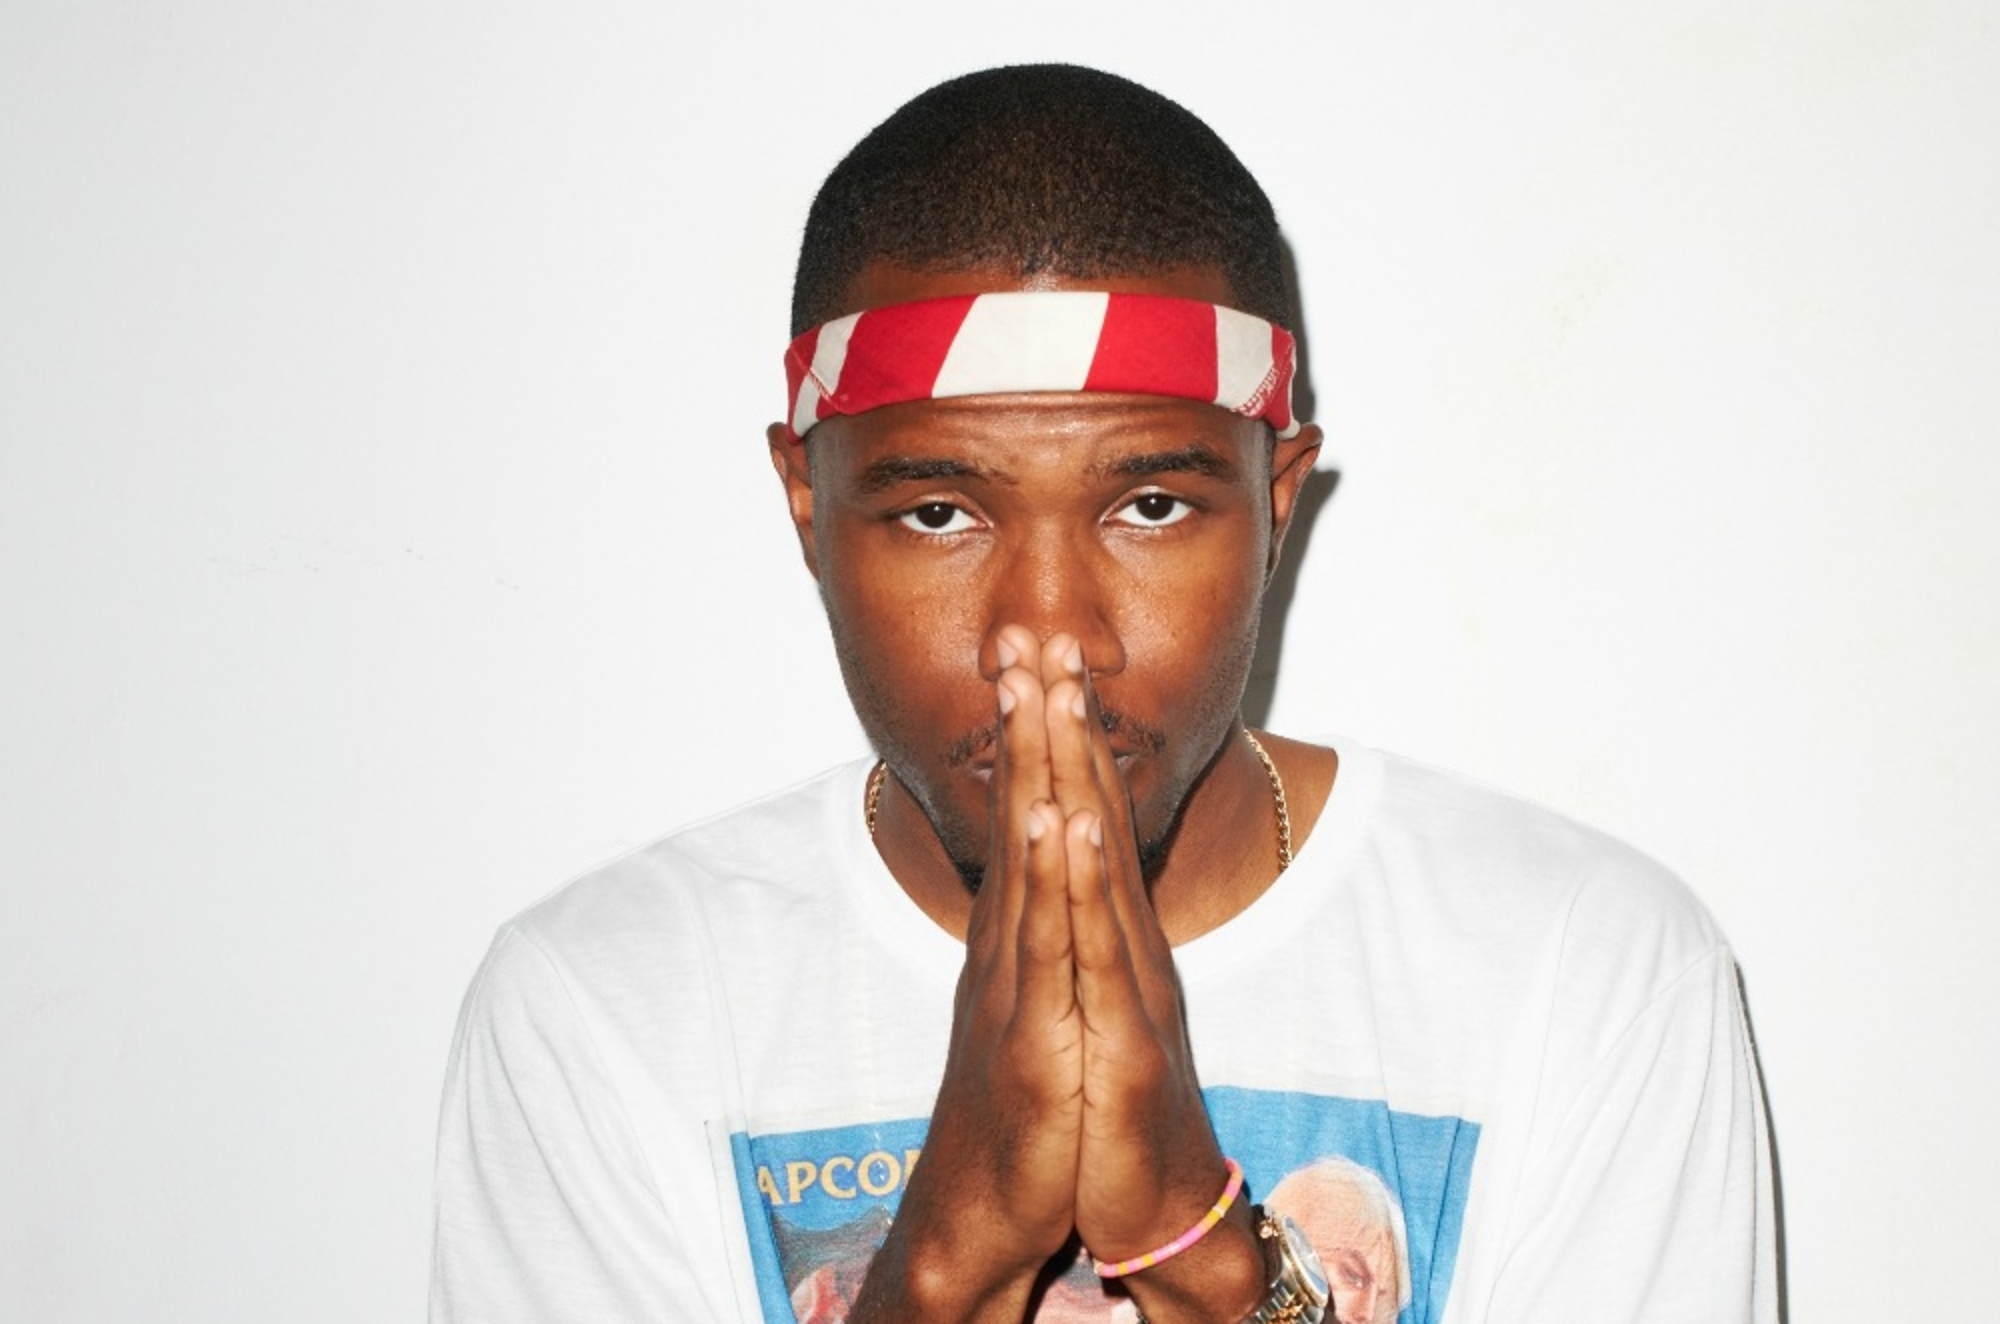

In [30]:
Image(filename='../images/frank.png')

### DANCEABILITY. 

###### According to the API documentation:
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

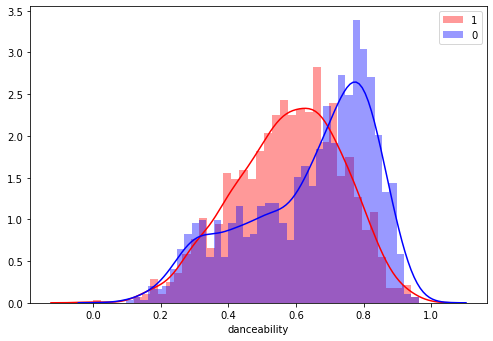

In [31]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.legend((1,0))

Looks like while my 'disliked' songs follow a skewed distribution torwards higher levels of danceability, my loved songs follow a super normal distribution on this feature showing that I enjoy a wide range of danceability level

#### Songs with lowest danceability 

In [32]:
low_dance = data[data['Like']==1].sort_values(by="danceability").head(30)
low_dance

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
821,1ND9sX1gObywQxC0YA0yOj,Painter (Valentine),Låpsley,0.000,0.0904,1,-16.261,0,0.95300,0.000187,0.1030,0.0000,0.000,189326,0,1
407,5eT7tvilxqz057gmVNJWcQ,Sh'Diah,Bon Iver,0.128,0.2600,5,-11.010,0,0.88600,0.594000,0.1500,0.0397,56.211,251600,4,1
630,1IRRqn75jaZHp7zMT1NGbZ,Moon River,Jacob Collier,0.144,0.1540,10,-12.596,1,0.97000,0.028400,0.1030,0.0400,85.391,496880,4,1
565,0u0IIYFZXtmtKTJilgOI3Z,Tongue (Lift 4),Nick Murphy,0.154,0.0275,1,-18.428,1,0.98800,0.000140,0.0939,0.0843,176.324,244603,5,1
83,5NfhgPuyfscfo71KxtNpdq,BalaDona,B Fachada,0.166,0.2880,9,-12.310,1,0.17200,0.971000,0.0541,0.0763,126.917,280907,4,1
102,0lQfRCpRUBcRauZ76hy7ae,Responso Para Maridos Transviados,B Fachada,0.167,0.1510,7,-13.427,1,0.93000,0.000873,0.1240,0.1400,71.349,177800,4,1
425,0YcAWPUwih5MrIlD90oiNu,Bruised Orange (Chain of Sorrow),Justin Vernon,0.169,0.4240,9,-8.871,1,0.98800,0.664000,0.0648,0.0777,50.570,241987,4,1
609,4X5zaUdlRhvBWYnyQIKmH8,Honeymoon,Lana Del Rey,0.169,0.2690,5,-13.265,0,0.95300,0.008280,0.1110,0.1730,74.847,350059,3,1
1144,2KNMqqNd3sLfeN4ukKduRT,Moon River,Frank Sinatra,0.171,0.0632,0,-20.776,1,0.94500,0.000027,0.1210,0.1680,81.406,199133,3,1
640,5xkNnSElXhDshIbg8C2RUU,L'hawaïenne,La Femme,0.175,0.4800,2,-9.378,1,0.91800,0.769000,0.1350,0.1820,84.016,486622,4,1


In [33]:
low_dance['main_artist'].value_counts().head(10)

Lana Del Rey           3
Daniel Caesar          2
B Fachada              2
James Blake            2
Nick Murphy            2
Tash Sultana           1
Mallu Magalhães        1
Frank Sinatra          1
As Rainhas do Baile    1
The Murlocs            1
Name: main_artist, dtype: int64

##### The fault's on this beautiful album..... guess LDR doesn't wanna dance w me

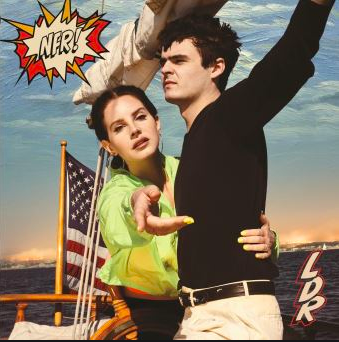

In [34]:
Image(filename='../images/LDR.png')

Spotify doesn’t give any further details as to the exact calculation behind ‘danceability’, but we can find a clue in comparing the two features

### ENERGY vs DANCEABILITY

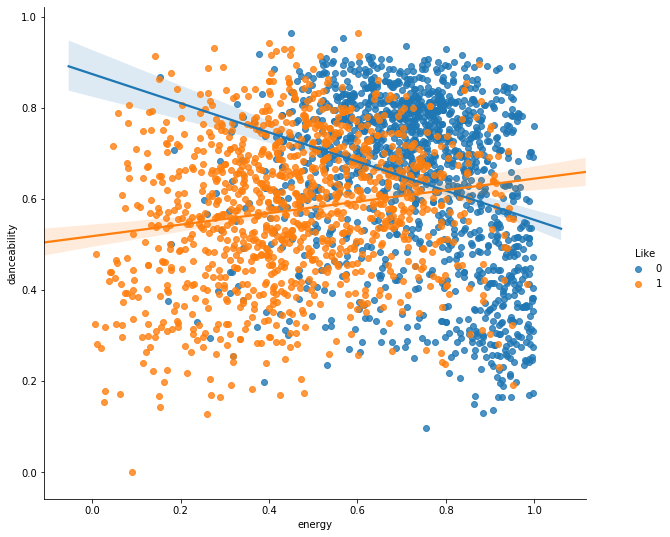

In [35]:
sns.lmplot(x="energy", y="danceability", data=data, hue='Like').fig.set_size_inches(10,8)

plt.show()

#from the graph below we can see that I do enjoy songs with normal level of dancability but low energy
#the imagine shows two very distinct clusters 

#### What is driving a High danceability but low Energy?

In [36]:
high_dance_lower_energy = data[data['Like']==1].sort_values(by="danceability", ascending=False).head(20)
high_dance_lower_energy

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
1050,6iHgkGwqtr5f4A6qMk0zdC,Tango In Harlem,Touch & Go,0.963,0.602,6,-14.037,1,0.2640,0.382000,0.0885,0.765,131.080,205600,4,1
954,0U1Bu9wLRAuNL00uYwubGp,Tranquilo,Thalma Freitas,0.941,0.400,10,-10.977,1,0.7730,0.021500,0.0800,0.878,120.715,259707,4,1
42,3p5cvrXVxBN2ety8OB4luc,JOAQUIM,S. PEDRO,0.931,0.276,9,-13.045,1,0.4430,0.168000,0.0969,0.473,119.902,183133,3,1
1071,0SwAOdc4C2kWUMbsXG4ztz,Most Really Pretty Girls Have Pretty Ugly Feet,HNNY,0.929,0.449,1,-10.425,1,0.0862,0.490000,0.0889,0.612,119.896,285440,4,1
1019,1g89nNWU8XIjUQwc8BNVTD,Am I a Girl? Am I a Boy? Do I Really Care?,In Love With a Ghost,0.928,0.433,0,-12.604,1,0.5430,0.323000,0.0904,0.757,104.981,59481,4,1
856,0lI4NU85a2bxlPVfzjOuTc,Song For You,Marbert Rocel,0.924,0.415,8,-13.764,1,0.1240,0.171000,0.0905,0.761,123.027,383840,4,1
1036,1eov6ZGStBvgaHBJvpMCsp,Caprichoso,V.Vizio,0.916,0.404,1,-10.326,1,0.4630,0.000000,0.1100,0.882,127.004,184274,4,1
1106,5jS8H3e5ehSHgEfAYoxF2s,Choses Qui Se Passent,matt.i,0.915,0.448,6,-7.182,0,0.1720,0.558000,0.1100,0.394,95.009,358679,4,1
332,1fGf3wl2mFYauz09H7TSQr,The Brazil I Want,O F F,0.914,0.515,1,-11.138,1,0.1990,0.866000,0.1030,0.918,129.884,110769,4,1
467,4L7jMAP8UcIe309yQmkdcO,Lost,Frank Ocean,0.913,0.603,8,-4.892,1,0.0272,0.000503,0.1670,0.497,123.061,234093,4,1
